# **Title of Project**

>
Passenger Travel (Footfall) Prediction


-------------

## **Objective**

Predict how many passengers will travel in future months based on past data.

## **Data Source**

https://github.com/YBIFoundation/Dataset/blob/main/AirTrafficIndia.csv

## **Import Library**

In [34]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


## **Import Data**

In [35]:
# load the dataset
df= pd.read_csv('/content/AirTrafficIndia.csv')

print("First 10 rows:")
display(df.head(10))

print("\nColumn names:")
print(df.columns.tolist())

First 10 rows:


,Year,Month,Quarter,Airline,Type,PassengerToIndia,PassengerFromIndia,FreightToIndia,FreightFromIndia
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680
5,2015,JAN,Q1,AEROFLOT,FOREIGN,5088.0,6901,7.581,199.696
6,2015,JAN,Q1,AEROLOGIC,FOREIGN,0.0,0,1.409,1.235
7,2015,JAN,Q1,AIR ARABIA,FOREIGN,77405.0,79096,191.549,1096.201
8,2015,JAN,Q1,AIR ASIA BERHAD,FOREIGN,25906.0,27950,33.524,307.431
9,2015,JAN,Q1,AIR AUSTRAL,FOREIGN,0.0,0,0.000,0.000



Column names:
['Year', 'Month', 'Quarter', 'Airline', 'Type', 'PassengerToIndia', 'PassengerFromIndia', 'FreightToIndia', 'FreightFromIndia']


## **Describe Data**

In [36]:
# quick stats
print("Info:")
df.info()

print("\nDescribe (numeric):")
display(df.describe())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2334 non-null   int64  
 1   Month               2334 non-null   object 
 2   Quarter             2334 non-null   object 
 3   Airline             2334 non-null   object 
 4   Type                2334 non-null   object 
 5   PassengerToIndia    2333 non-null   float64
 6   PassengerFromIndia  2334 non-null   int64  
 7   FreightToIndia      2334 non-null   float64
 8   FreightFromIndia    2334 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 164.2+ KB

Describe (numeric):


,Year,PassengerToIndia,PassengerFromIndia,FreightToIndia,FreightFromIndia
count,2334.000000,2333.000000,2334.000000,2334.000000,2334.000000
mean,2015.699229,24476.482212,25452.484576,550.932764,865.262860
std,0.674328,51146.213682,52474.422940,1281.898272,2151.224952
min,2015.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,1488.000000,1629.250000,0.300000,8.525000
50%,2016.000000,4960.000000,5264.500000,53.950000,154.325000
75%,2016.000000,23290.000000,23418.500000,311.214750,770.028000
max,2017.000000,402497.000000,400155.000000,14916.471000,48640.298000


## **Data Visualization**

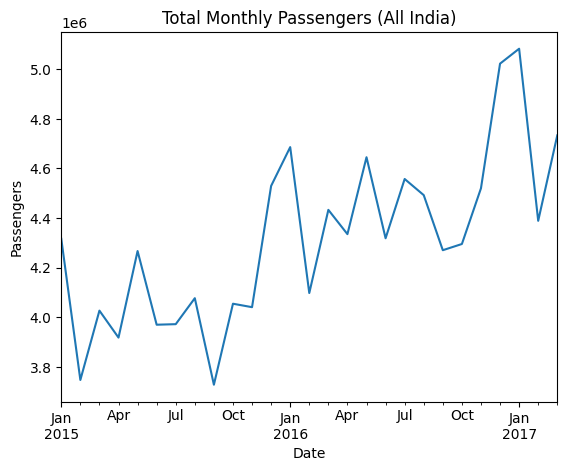

In [37]:
# data cleaning create new columns

df["TotalPassengers"] = df["PassengerToIndia"].fillna(0) + df["PassengerFromIndia"].fillna(0)
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str) + "-01", format='%Y-%b-%d')

# Aggregate to total India (sum over airlines/types)
monthly = df.groupby('Date')['TotalPassengers'].sum().sort_index()

# Plot the monthly total passengers
plt.figure()
monthly.plot(title='Total Monthly Passengers (All India)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

## **Data Preprocessing**

In [38]:
# Data Preprocessing

df["TimeIndex"] = range(1, len(df) + 1)

## **Define Target Variable (y) and Feature Variables (X)**

In [39]:
X = df[["TimeIndex"]]
y = df["TotalPassengers"]

## **Train Test Split**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

## **Modeling**

In [41]:
# using linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **Model Evaluation**

In [42]:
# for future track
y_pred = model.predict(X_test)

# for next 12 months
last_index = df["TimeIndex"].iloc[-1]
future_index = np.arange(last_index+1, last_index+13)

# Create a DataFrame for future_index with the same feature name as X_train
future_X = pd.DataFrame(future_index, columns=['TimeIndex'])

future_pred = model.predict(future_X)

print("Next 12-month passenger forecast:")
print(future_pred)

Next 12-month passenger forecast:
[50843.6353561  50843.98321324 50844.33107039 50844.67892753
 50845.02678467 50845.37464181 50845.72249895 50846.0703561
 50846.41821324 50846.76607038 50847.11392752 50847.46178467]


## **Prediction**

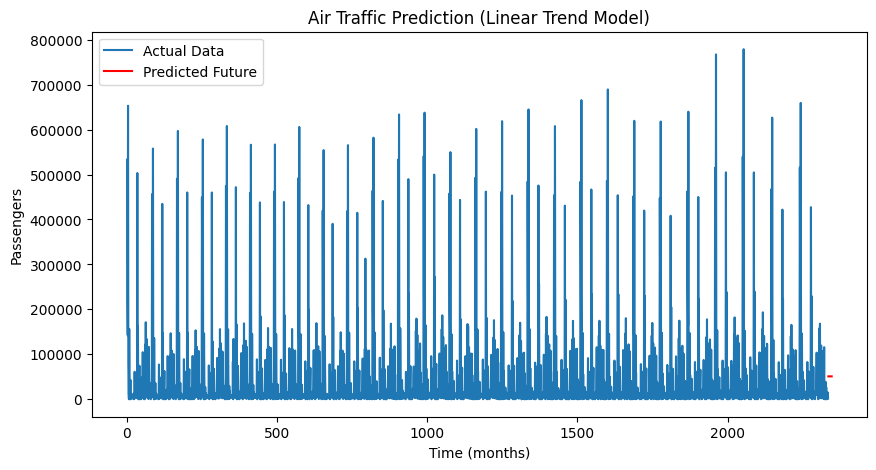

In [43]:
# plot the prediction
plt.figure(figsize=(10,5))
plt.plot(df["TimeIndex"], df["TotalPassengers"], label="Actual Data")
plt.plot(future_index, future_pred, label="Predicted Future", color="red")
plt.xlabel("Time (months)")
plt.ylabel("Passengers")
plt.title("Air Traffic Prediction (Linear Trend Model)")
plt.legend()
plt.show()

## **Explaination**

The model used in this project is Linear Regression. Linear Regression analyzes the historical passenger numbers and identifies the general direction or trend in the data. It then draws the best-fit straight line through these past values. Once the trend line is learned, the model extends this line forward to estimate future values. Therefore, it is used to predict the number of passengers for upcoming months based on previous monthly traffic patterns.